#     Problem Statement

In [ ]:
#A multinational company is experiencing a high employee attrition rate, impacting productivity and operational efficiency.
#HR managers are unable to pinpoint the exact reasons why employees leave.
#Some employees are overworked, while others feel undervalued due to a lack of promotions. 
#The company wants to use historical employee data to predict attrition risk and implement retention strategies before valuable employees leave.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Downloads\\Employee_Retention_Prediction.csv")
df

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [7]:
col=df.columns
col

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [8]:
for i in col:
    print(df[i].value_counts())
    print('*'*100)

empid
1        1
10005    1
9993     1
9994     1
9995     1
        ..
5005     1
5006     1
5007     1
5008     1
14999    1
Name: count, Length: 14999, dtype: int64
****************************************************************************************************
satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: count, Length: 92, dtype: int64
****************************************************************************************************
last_evaluation
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: count, Length: 65, dtype: int64
****************************************************************************************************
number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64
*****************************************************

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['empid'], axis=1, inplace=True)

In [11]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1


In [12]:
df.isna().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [13]:

df['satisfaction_level'].fillna(df['satisfaction_level'].median(),inplace=True)





C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\2424059724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction_level'].fillna(df['satisfaction_level'].median(),inplace=True)


In [14]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [15]:
num=df.select_dtypes(exclude='object')
num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1
14995,0.37,0.48,2,160,3,0,0,1
14996,0.37,0.53,2,143,3,0,0,1
14997,0.11,0.96,6,280,4,0,0,1


In [16]:
cat=df.select_dtypes(include='object')
cat

,salary
0,low
1,medium
2,medium
3,low
4,low
...,...
14994,low
14995,low
14996,low
14997,low


#  Outliers

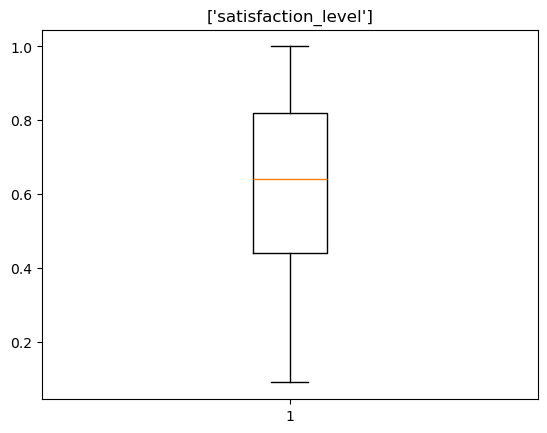

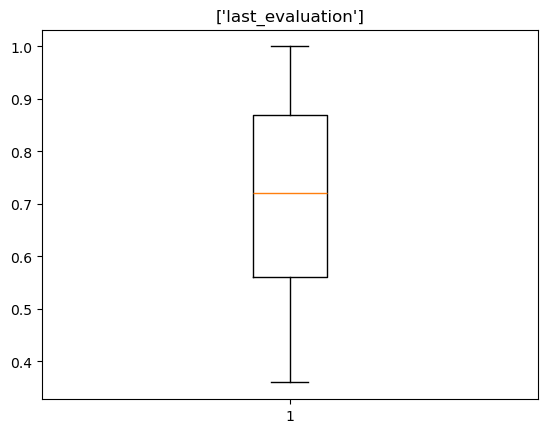

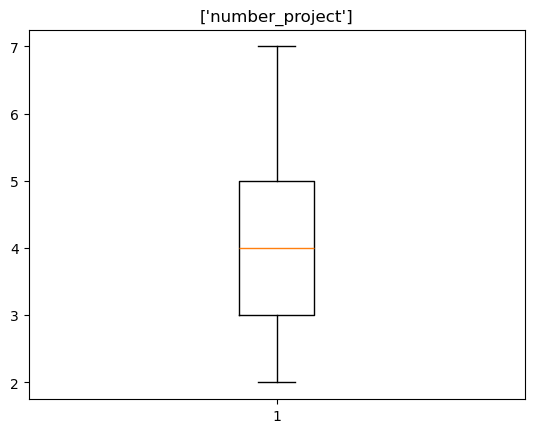

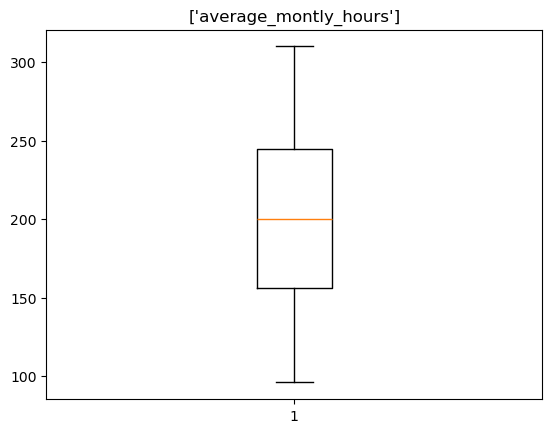

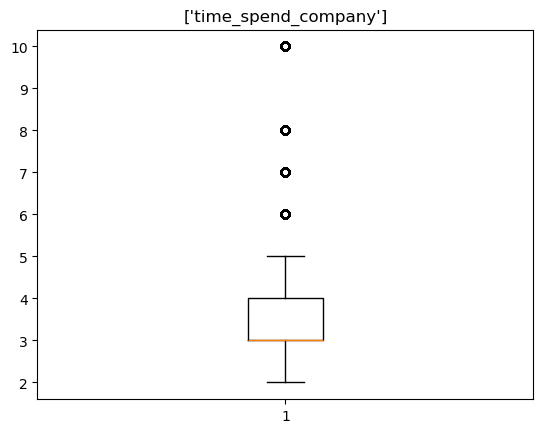

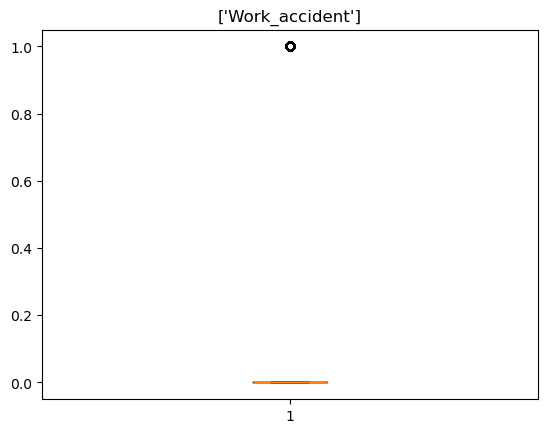

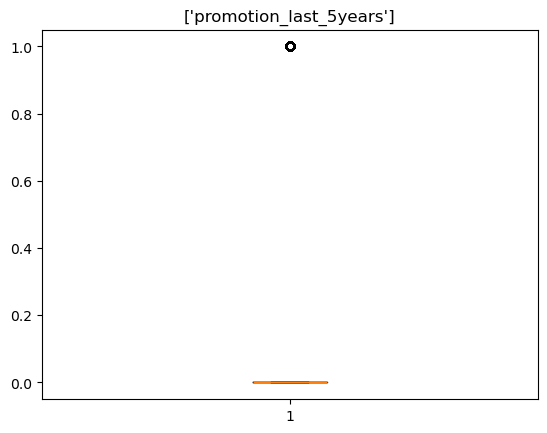

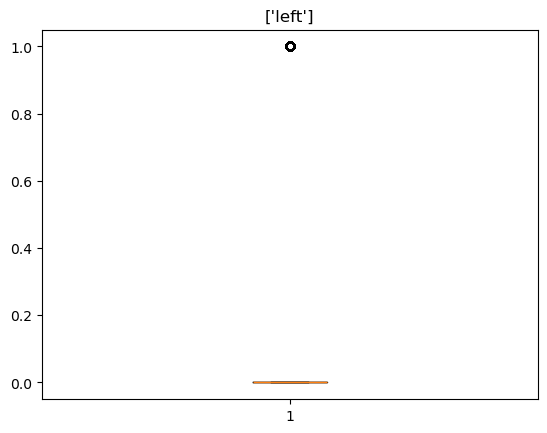

In [18]:
import matplotlib.pyplot as plt
for i in num:
    plt.boxplot(df[i])
    plt.title([i])
    plt.show()

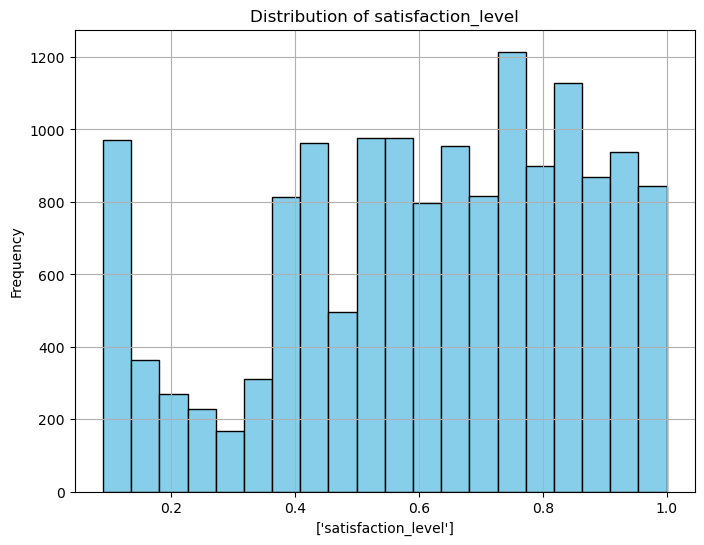

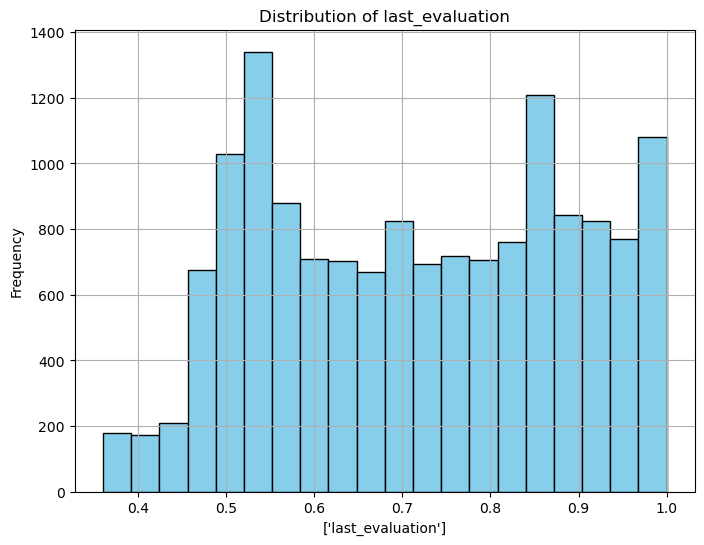

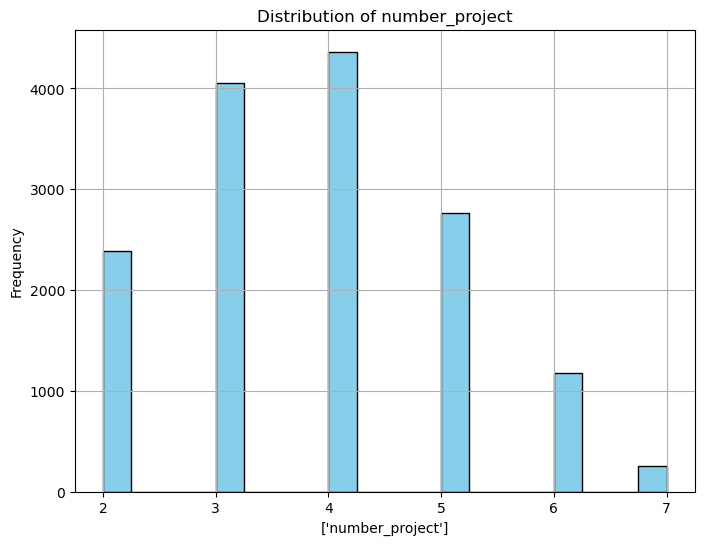

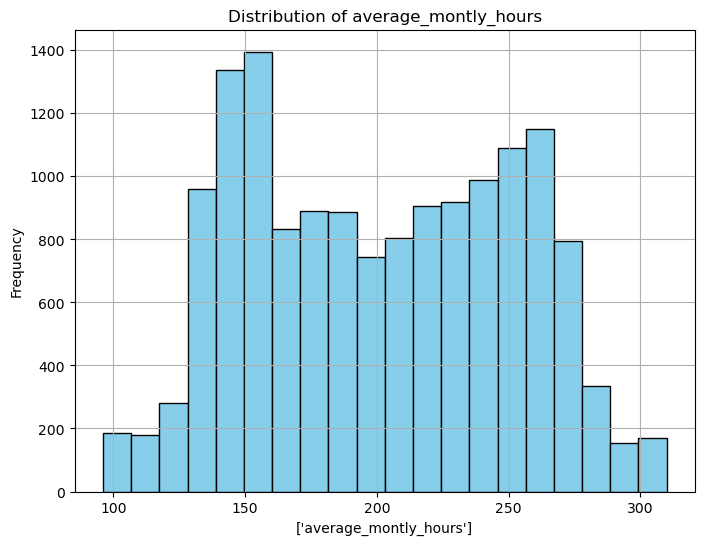

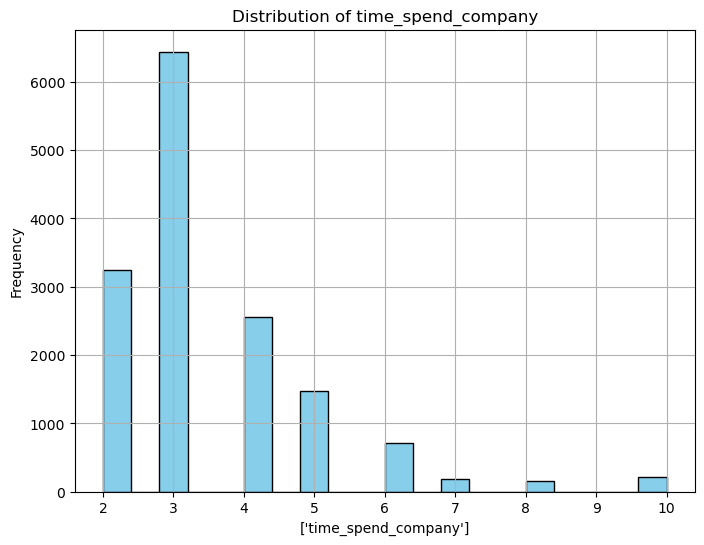

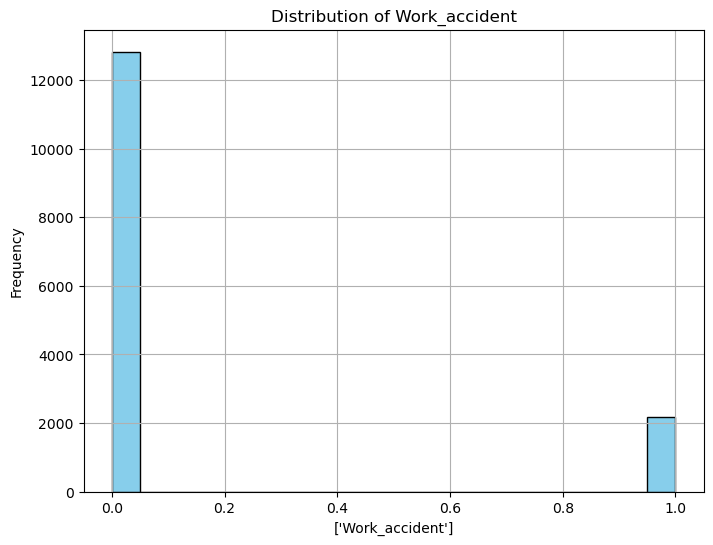

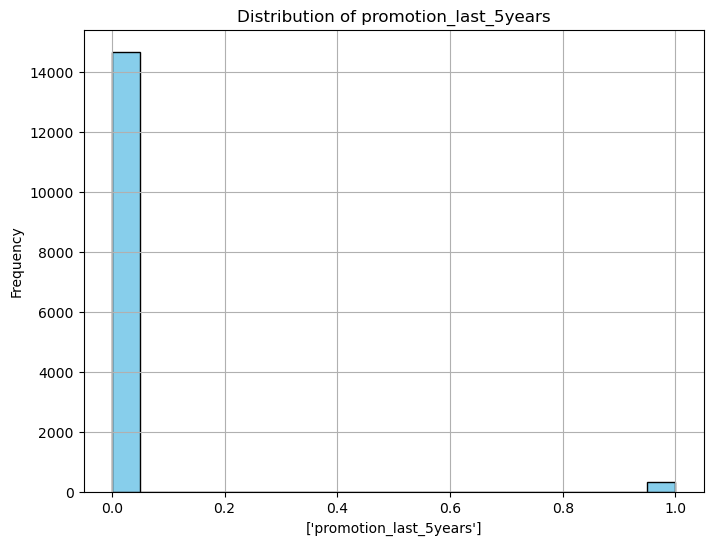

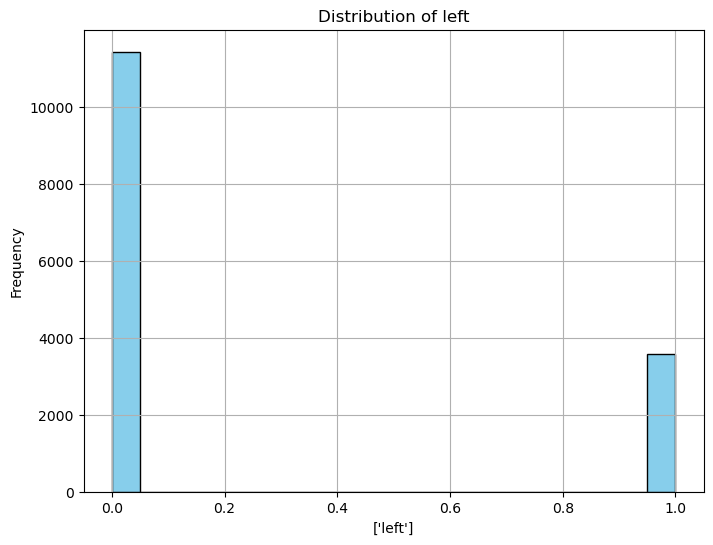

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


for i in num:
    plt.figure(figsize=(8,6))
    df[i].hist(bins=20,color='skyblue',edgecolor='black')
    plt.title(f'Distribution of {i}')
    plt.xlabel([i])
    plt.ylabel('Frequency')
    plt.show()

#  Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
a

LabelEncoder()

In [22]:
cat

,salary
0,low
1,medium
2,medium
3,low
4,low
...,...
14994,low
14995,low
14996,low
14997,low


In [23]:
cat['salary']=a.fit_transform(cat['salary'])



In [24]:
cat

,salary
0,1
1,2
2,2
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


# MinMax Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
s

MinMaxScaler()

In [27]:
n=num.columns
n

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'left'],
      dtype='object')

In [28]:
for i in n:
    num[i]=s.fit_transform(num[[i]])

In [29]:
num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,1.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,1.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,1.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,1.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,1.0


# Skewness

In [31]:
from scipy.stats import skew

In [32]:
num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,1.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,1.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,1.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,1.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,1.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


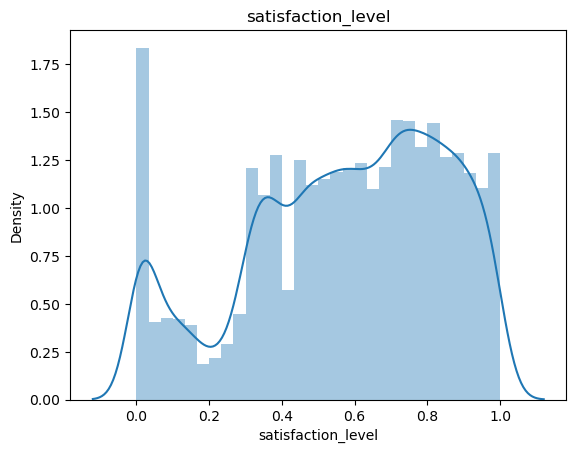

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


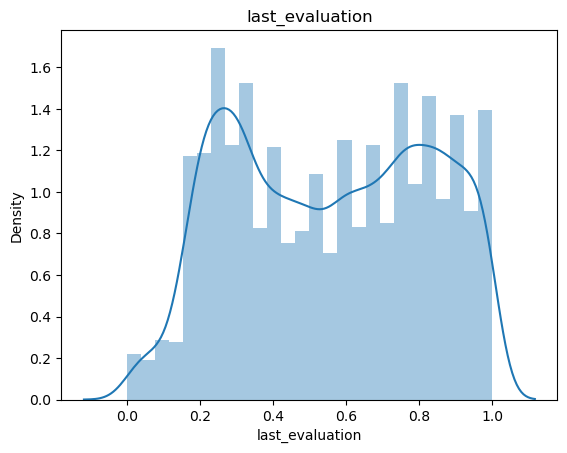

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


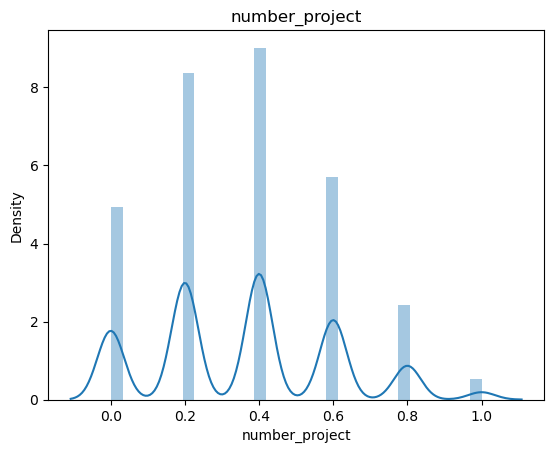

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


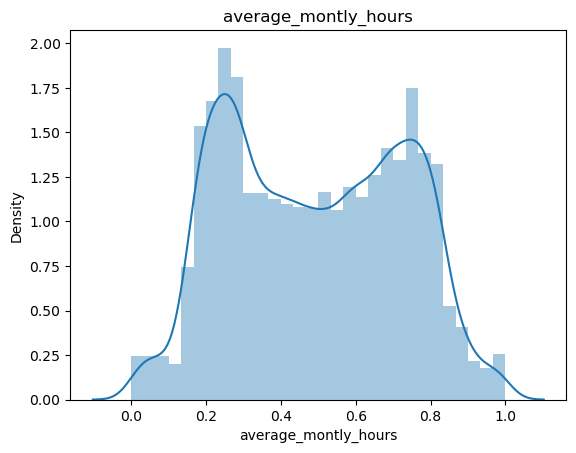

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


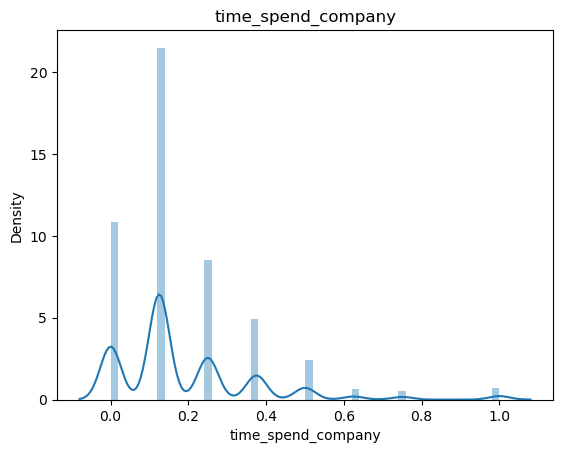

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


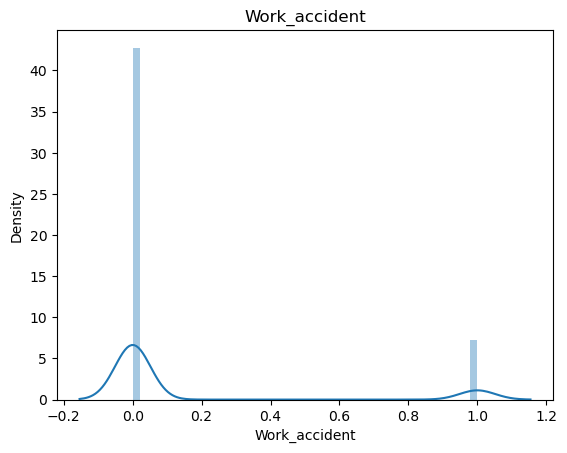

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


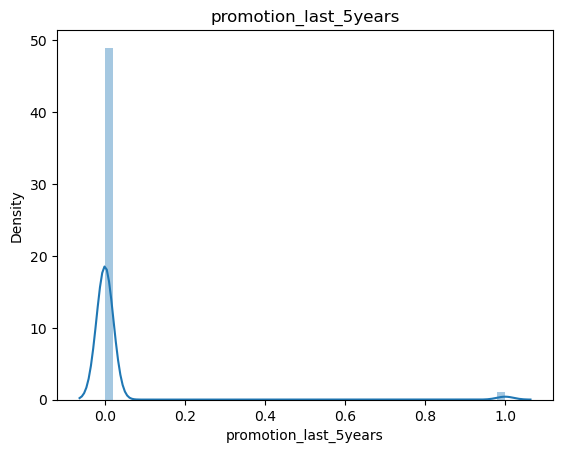

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\3088444955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


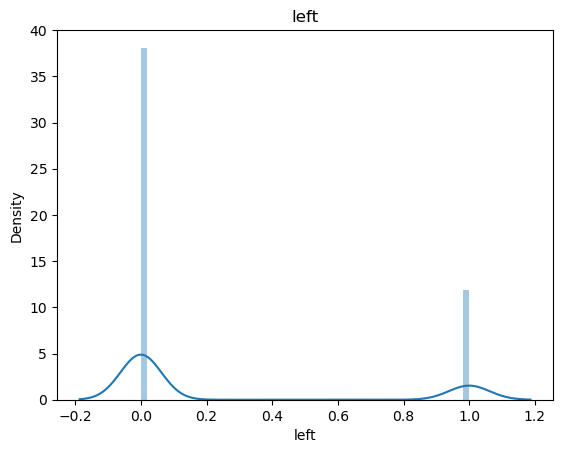

In [33]:
for i in n:
    sns.distplot(num[i])  
    plt.title(i) 
    plt.show() 

In [34]:
for i in n:
    print(i,skew(num[i]))
    print("*"*100)

satisfaction_level -0.4766881351681827
****************************************************************************************************
last_evaluation -0.026619087437320905
****************************************************************************************************
number_project 0.3376718386088247
****************************************************************************************************
average_montly_hours 0.052836704718269206
****************************************************************************************************
time_spend_company 1.8531336980238529
****************************************************************************************************
Work_accident 2.0209466044923268
****************************************************************************************************
promotion_last_5years 6.636304620996621
****************************************************************************************************
left 1.2299195708620216
*****

In [35]:
import numpy as np
num['promotion_last_5years']=np.sqrt(num['promotion_last_5years'])
num['Work_accident']=np.sqrt(num['Work_accident'])
num['time_spend_company']=np.sqrt(num['time_spend_company'])

In [36]:
for i in n:
    print(i,skew(num[i]))
    print("*"*100)

satisfaction_level -0.4766881351681827
****************************************************************************************************
last_evaluation -0.026619087437320905
****************************************************************************************************
number_project 0.3376718386088247
****************************************************************************************************
average_montly_hours 0.052836704718269206
****************************************************************************************************
time_spend_company -0.05190508956421815
****************************************************************************************************
Work_accident 2.0209466044923268
****************************************************************************************************
promotion_last_5years 6.636304620996621
****************************************************************************************************
left 1.2299195708620216
***

In [37]:
new_df=pd.concat([cat,num],axis=1)
new_df

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,1,0.318681,0.265625,0.0,0.285047,0.353553,0.0,0.0,1.0
1,2,0.780220,0.781250,0.6,0.775701,0.707107,0.0,0.0,1.0
2,2,0.021978,0.812500,1.0,0.822430,0.500000,0.0,0.0,1.0
3,1,0.692308,0.796875,0.6,0.593458,0.612372,0.0,0.0,1.0
4,1,0.307692,0.250000,0.0,0.294393,0.353553,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14994,1,0.340659,0.328125,0.0,0.257009,0.353553,0.0,0.0,1.0
14995,1,0.307692,0.187500,0.0,0.299065,0.353553,0.0,0.0,1.0
14996,1,0.307692,0.265625,0.0,0.219626,0.353553,0.0,0.0,1.0
14997,1,0.021978,0.937500,0.8,0.859813,0.500000,0.0,0.0,1.0


# Correlation

In [39]:
new_df.corr().tail(1)

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
left,-0.001294,-0.38816,0.006567,0.023787,0.071287,0.242813,-0.154622,-0.061788,1.0


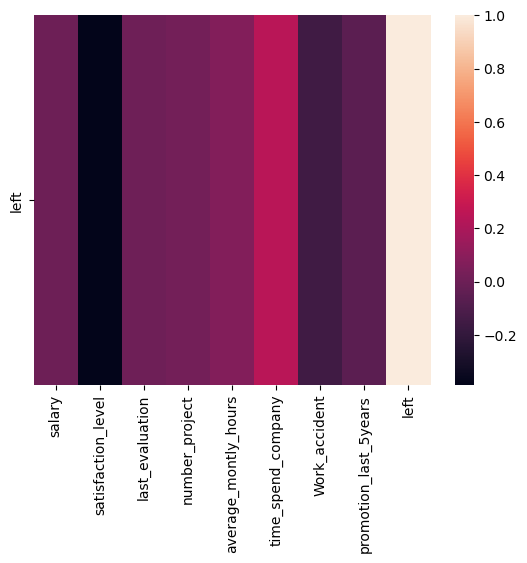

In [40]:
sns.heatmap(new_df.corr().tail(1))
plt.show()

#  Spilting of Data

In [42]:
x = new_df.drop('left', axis= 1)
y = new_df['left']

In [43]:
x

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1,0.318681,0.265625,0.0,0.285047,0.353553,0.0,0.0
1,2,0.780220,0.781250,0.6,0.775701,0.707107,0.0,0.0
2,2,0.021978,0.812500,1.0,0.822430,0.500000,0.0,0.0
3,1,0.692308,0.796875,0.6,0.593458,0.612372,0.0,0.0
4,1,0.307692,0.250000,0.0,0.294393,0.353553,0.0,0.0
...,...,...,...,...,...,...,...,...
14994,1,0.340659,0.328125,0.0,0.257009,0.353553,0.0,0.0
14995,1,0.307692,0.187500,0.0,0.299065,0.353553,0.0,0.0
14996,1,0.307692,0.265625,0.0,0.219626,0.353553,0.0,0.0
14997,1,0.021978,0.937500,0.8,0.859813,0.500000,0.0,0.0


In [44]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14994    1.0
14995    1.0
14996    1.0
14997    1.0
14998    1.0
Name: left, Length: 14999, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [46]:
x_train

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
13388,2,0.835165,0.703125,0.4,0.766355,0.353553,0.0,0.0
6481,2,0.747253,0.593750,0.0,0.425234,0.707107,0.0,0.0
1494,1,0.087912,0.609375,0.2,0.429907,0.500000,0.0,0.0
2518,2,0.593407,0.968750,0.4,0.369159,0.000000,0.0,0.0
9958,1,0.901099,0.359375,0.6,0.387850,0.353553,0.0,0.0
...,...,...,...,...,...,...,...,...
11633,0,0.747253,0.828125,0.4,0.808411,1.000000,0.0,0.0
1344,1,0.329670,0.328125,0.0,0.252336,0.353553,0.0,0.0
12815,1,0.780220,0.484375,0.2,0.654206,0.353553,1.0,0.0
7293,2,0.967033,0.437500,0.4,0.261682,0.000000,0.0,0.0


In [47]:
y_train

13388    0.0
6481     0.0
1494     1.0
2518     0.0
9958     0.0
        ... 
11633    0.0
1344     1.0
12815    0.0
7293     0.0
1289     1.0
Name: left, Length: 11999, dtype: float64

# Smote

In [49]:
new_df['left'].value_counts()

left
0.0    11428
1.0     3571
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_6152\2442892823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=new_df, palette='pastel')


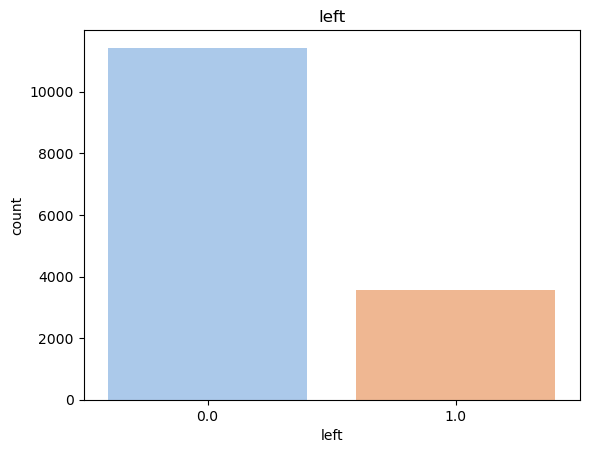

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='left', data=new_df, palette='pastel')
plt.title("left")
plt.show()

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
x = new_df.drop('left', axis=1)
y = new_df['left']

smt = SMOTE(random_state=10)
x_sample, y_sample = smt.fit_resample(x,y)


x = x_sample
y = y_sample

In [53]:
y_sample.value_counts()

left
1.0    11428
0.0    11428
Name: count, dtype: int64

#  Logistic Regression

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [56]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model

LogisticRegression()

In [57]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred_log =logistic_model.predict(x_test)
y_pred_log

array([0., 0., 1., ..., 0., 0., 0.])

In [59]:
# Testing Score
logistic_model.score(x_test,y_test)

0.758

In [60]:
# Training score
logistic_model.score(x_train,y_train)

0.7608967413951162

Confusion Matrix:
[[2077  189]
 [ 537  197]]


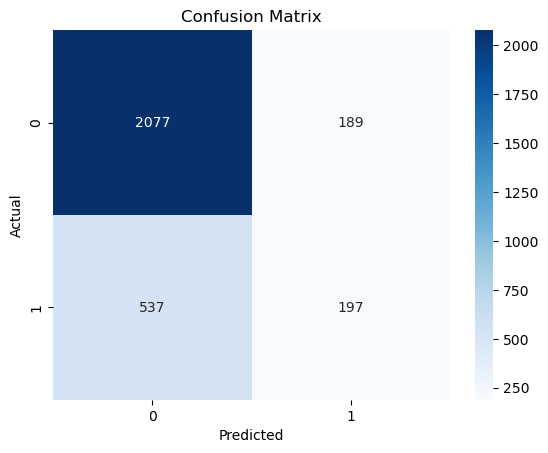

In [61]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(conf_matrix)



# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
print("Classification Report:")
print(classification_report(y_test,y_pred_log))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2266
         1.0       0.51      0.27      0.35       734

    accuracy                           0.76      3000
   macro avg       0.65      0.59      0.60      3000
weighted avg       0.73      0.76      0.73      3000



In [63]:
y_pred_prob =logistic_model.predict_proba(x_test)
y_pred_prob 

array([[0.88347479, 0.11652521],
       [0.60069855, 0.39930145],
       [0.41905757, 0.58094243],
       ...,
       [0.77942929, 0.22057071],
       [0.93998168, 0.06001832],
       [0.8784034 , 0.1215966 ]])

In [64]:
y_pred_prob[:5]

array([[0.88347479, 0.11652521],
       [0.60069855, 0.39930145],
       [0.41905757, 0.58094243],
       [0.9245558 , 0.0754442 ],
       [0.7485127 , 0.2514873 ]])

In [65]:
y_pred_prob =logistic_model.predict_proba(x_train)
y_pred_prob 


array([[0.88903736, 0.11096264],
       [0.6067292 , 0.3932708 ],
       [0.26690521, 0.73309479],
       ...,
       [0.95965899, 0.04034101],
       [0.98363991, 0.01636009],
       [0.78576868, 0.21423132]])

In [66]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

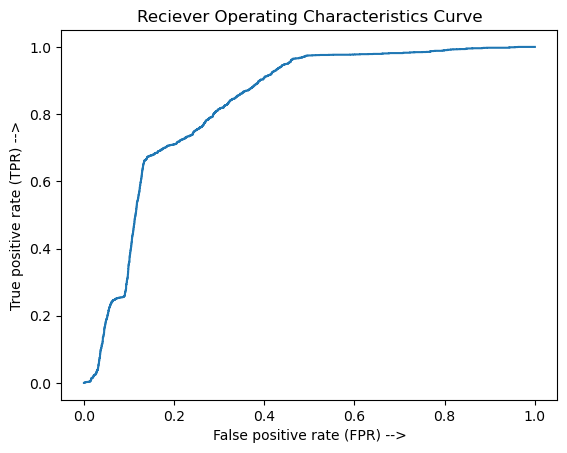

In [67]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [68]:
threshold = [0.5, 0.6, 0.7, 0.8,0.9]

df = pd.DataFrame()

y_pred_prob =logistic_model.predict_proba(x_test)
y_pred_prob 

for i in  threshold:
    preds = (logistic_model.predict_proba(x_test)[:,1] > i).astype(int)

    df1 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df = pd.concat([df,df1], axis = 1)
    
df.columns = threshold
df

,0.5,0.6,0.7,0.8,0.9
Accuracy,0.758000,0.772000,0.744667,0.75,0.755
recall,0.268392,0.232970,0.040872,0.00,0.000
Precision,0.510363,0.585616,0.326087,0.00,0.000
F1-Score,0.351786,0.333333,0.072639,0.00,0.000


# Decision Tree 

In [70]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [71]:
dectree=DecisionTreeClassifier()
dectree

DecisionTreeClassifier()

In [72]:
dectree_model=dectree.fit(x_train,y_train)
dectree_model

DecisionTreeClassifier()

In [73]:
y_pred=dectree_model.predict(x_test)

In [74]:
#training Score
dectree_model.score(x_train,y_train)

1.0

In [75]:
#testing Score
dectree_model.score(x_test,y_test)

0.975

# Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [78]:
hyperparameter={'criterion':['gini','entropy'],
                'max_depth':np.arange(3,9),
                'min_samples_leaf':np.arange(2,15)}
gscv_dt_clf=GridSearchCV(dectree_model,hyperparameter,cv=5)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [79]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2)

In [80]:
gscv_dt_clf.score(x_test,y_test)

0.974

In [81]:
gscv_dt_clf.score(x_train,y_train)

0.9849987498958247

In [157]:
import pickle 
pickle.dump(logistic_model,open('model1.pkl','wb'))